### Exercise 3.2

This example will explore geometry and sampling probabilities in high-dimensional spaces. 

Consider a two-dimensional square dart board with length $L=2$ on both sides and a circle of radius $R=1$ in the middle. 

- Write a program to throw $10,000$ darts by generating a uniform random $x$ and $y$ position on the square. 

- Compute the radius for each point and compute what fraction land inside the circle (radius $<1$).

- Is this consistent with your expectation based on the area of the circle and the square?

- Repeat this experiment, throwing $10,000$ darts randomly on an $N$-dimensional cube (length $L=2$) with an $N$-dimensional sphere inside (radius $R=1$), for $N=2$ through $N=10$. 

- For a given $N$, what fraction of the points land inside the sphere.

- Plot this fraction versus $N$. Also compute the histogram of the radii of the randomly sampled points for each $N$ and plot these.

- What trends do you notice in the data?

In [1]:
import numpy as np

In [3]:
np.random.seed(6397)

n = 10000
L = 2

xcoord = np.random.uniform(-L/2, L/2, n)
ycoord = np.random.uniform(-L/2, L/2, n)

In [4]:
# Compute the radius for each point
r = np.sqrt(xcoord**2 + ycoord**2)
r

array([0.44589258, 0.99722729, 0.60628759, ..., 0.97131075, 0.35189129,
       0.92042119])

In [5]:
# Compute what fraction land inside the circle
print(sum(r<1)/n)
print(np.pi/(L*L))

0.7857
0.7853981633974483


In [7]:
zcoord = np.random.uniform(-L/2, L/2, n)
r = np.sqrt(xcoord**2 + ycoord**2 + zcoord**2)

# Fraction of the points land inside the sphere
print(sum(r<1)/n)
print((4/3)*np.pi/(L*L*L))

0.525
0.5235987755982988


In [8]:
N = (100, 10**3, 10**4, 10**5, 10**6)
rfrac = np.empty(len(N))

In [9]:
r = {}

In [10]:
for i in range(len(N)):
    xcoord = np.random.uniform(-L/2, L/2, N[i])
    ycoord = np.random.uniform(-L/2, L/2, N[i])
    zcoord = np.random.uniform(-L/2, L/2, N[i])
    r[i] = np.sqrt(xcoord**2 + ycoord**2 + zcoord**2)
    rfrac[i] = sum(r[i]<1)/N[i]

In [11]:
import matplotlib.pyplot as plt

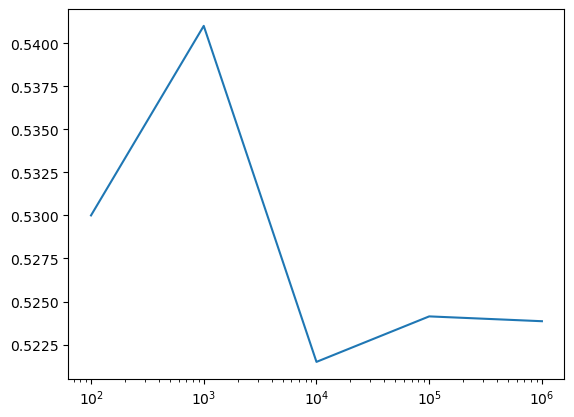

In [12]:
# Plot this fraction versus N
plt.semilogx(N, rfrac)
plt.show()

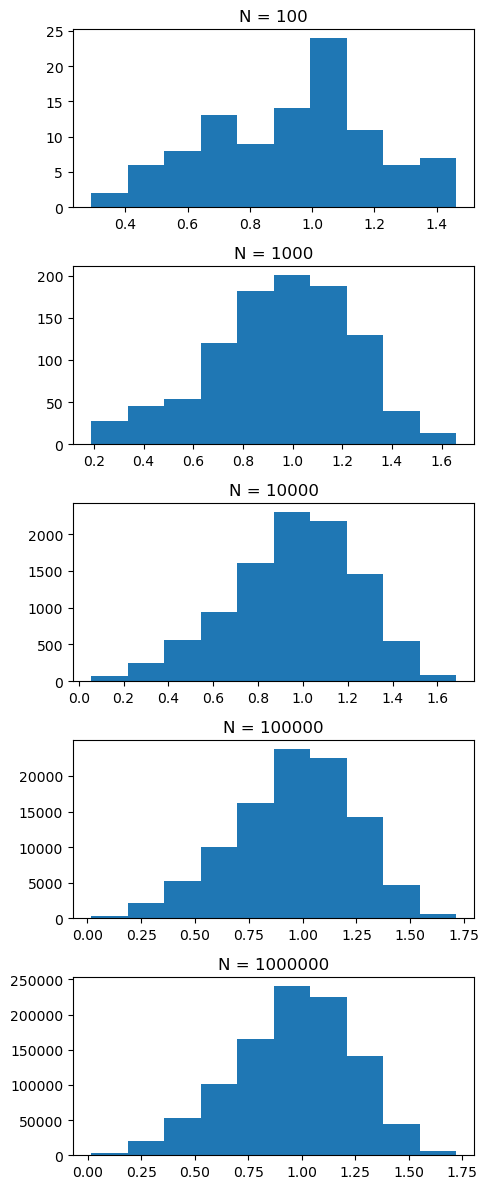

In [13]:
# Compute the histogram of the radii of the randomly sampled points for each N and plot these
fig,axs = plt.subplots(5,1, figsize=(5,12))

for i in range(len(N)):
    axs[i].hist(r[i])
    axs[i].set_title("N = " + str(N[i]))


fig.tight_layout()